In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings #to remove warning message
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [9]:
data["MinTemp"].fillna(data["MinTemp"].mean(),inplace=True)

In [10]:
data["MaxTemp"].fillna(data["MaxTemp"].mean(),inplace=True)

In [11]:
data["Rainfall"].fillna(data["Rainfall"].median(),inplace=True)

In [12]:
data["Evaporation"].fillna(data["Evaporation"].median(),inplace=True)

In [13]:
data["Sunshine"].fillna(data["Sunshine"].median(),inplace=True)

In [14]:
data["WindGustDir"].fillna(method='ffill',inplace=True)

In [15]:
data["WindGustSpeed"].fillna(data["WindGustSpeed"].mean(),inplace=True)

In [16]:
data["WindDir9am"].fillna(method='bfill',inplace=True)

In [17]:
data["WindDir3pm"].fillna(method='ffill',inplace=True)

In [18]:
data["WindSpeed9am"].fillna(data["WindSpeed9am"].mean(),inplace=True)

In [19]:
data["WindSpeed3pm"].fillna(data["WindSpeed3pm"].mean(),inplace=True)

In [20]:
data["Humidity9am"].fillna(data["Humidity9am"].mean(),inplace=True)

In [21]:
data["Humidity3pm"].fillna(data["Humidity3pm"].mean(),inplace=True)

In [22]:
data["Pressure9am"].fillna(data["Pressure9am"].mean(),inplace=True)

In [23]:
data["Pressure3pm"].fillna(data["Pressure3pm"].mean(),inplace=True)

In [24]:
data["Cloud9am"].fillna(data["Cloud9am"].mean(),inplace=True)

In [25]:
data["Cloud3pm"].fillna(data["Cloud3pm"].mean(),inplace=True)

In [26]:
data["Temp9am"].fillna(data["Temp9am"].median(),inplace=True)

In [27]:
data["Temp3pm"].fillna(data["Temp3pm"].median(),inplace=True)

In [28]:
data["RainToday"].fillna(method='ffill',inplace=True)

In [29]:
data["RainTomorrow"].fillna(method='ffill',inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [31]:
data.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.307990,5.179779,7.989889,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.987101,21.668916
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,2011-01-11 00:00:00,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,2013-06-02 00:00:00,12.100000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.700000,21.100000
75%,2015-06-14 00:00:00,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000
std,NaN,6.365750,7.088124,8.389771,3.178819,2.757790,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449299,6.850658


In [32]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,4.8,8.4,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,4.8,8.4,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,4.8,8.4,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,4.8,8.4,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,4.8,8.4,W,28.0,S,...,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,Yes,No


In [33]:
data.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.400000,0.0,4.8,8.4,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,4.8,8.4,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,4.8,8.4,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,4.8,8.4,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,23.221348,0.0,4.8,8.4,SE,40.03523,ESE,...,62.0,36.0,1020.2,1017.9,8.000000,8.00000,15.0,20.9,No,No


In [34]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [35]:
data['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

RainToday
No     112698
Yes     32762
Name: count, dtype: int64


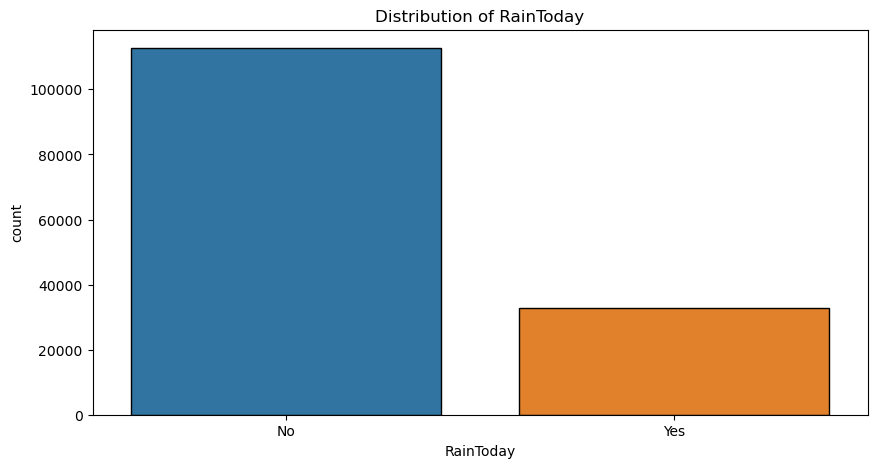

RainTomorrow
No     112701
Yes     32759
Name: count, dtype: int64


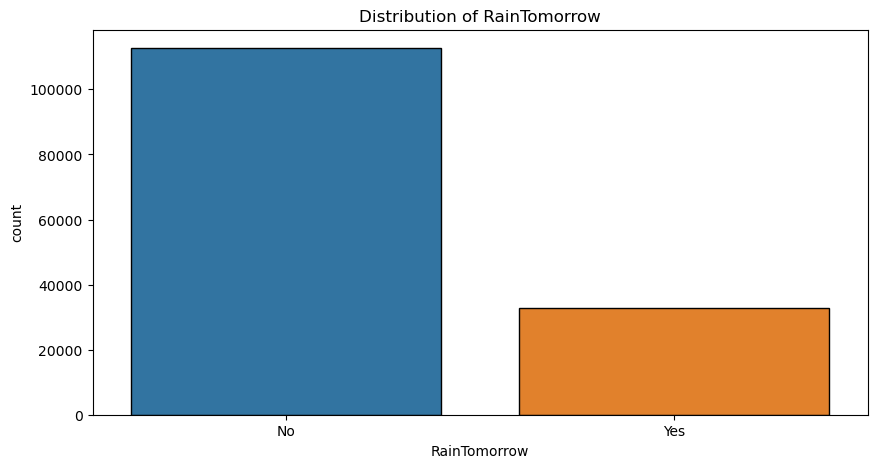

In [36]:
# Example count plot for 'RainToday' and 'RainTomorrow'
print(data['RainToday'].value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(x='RainToday', data=data,edgecolor='black')
plt.title('Distribution of RainToday')
plt.show()
print(data['RainTomorrow'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(x='RainTomorrow', data=data,edgecolor='black')
plt.title('Distribution of RainTomorrow')
plt.show()


WindDir9am
N      12782
SE     10022
NW      9854
SSE     9824
E       9720
S       9263
SW      9105
W       8865
NNE     8826
NNW     8633
NE      8550
ENE     8422
SSW     8066
ESE     8020
WNW     7860
WSW     7648
Name: count, dtype: int64


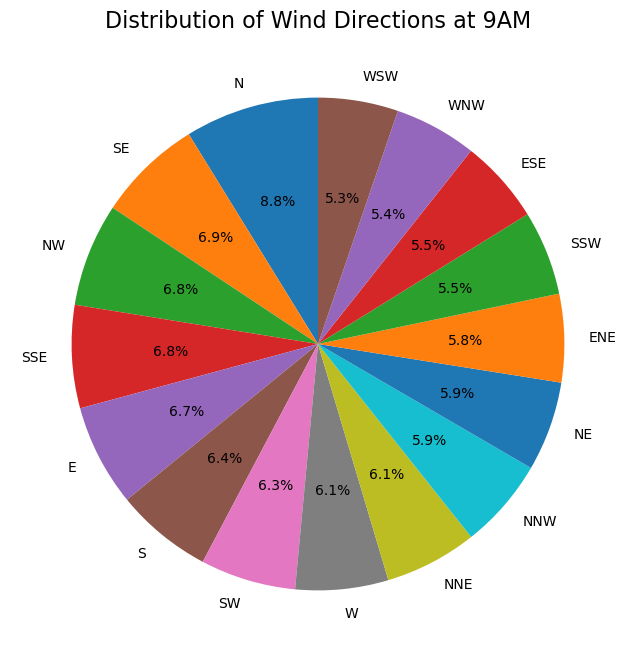

In [37]:
# Count the occurrences of each wind gust direction
wind_gust_dir_counts = data['WindDir9am'].value_counts()
print(wind_gust_dir_counts)
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(wind_gust_dir_counts, labels=wind_gust_dir_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Wind Directions at 9AM', fontsize=16)
plt.show()



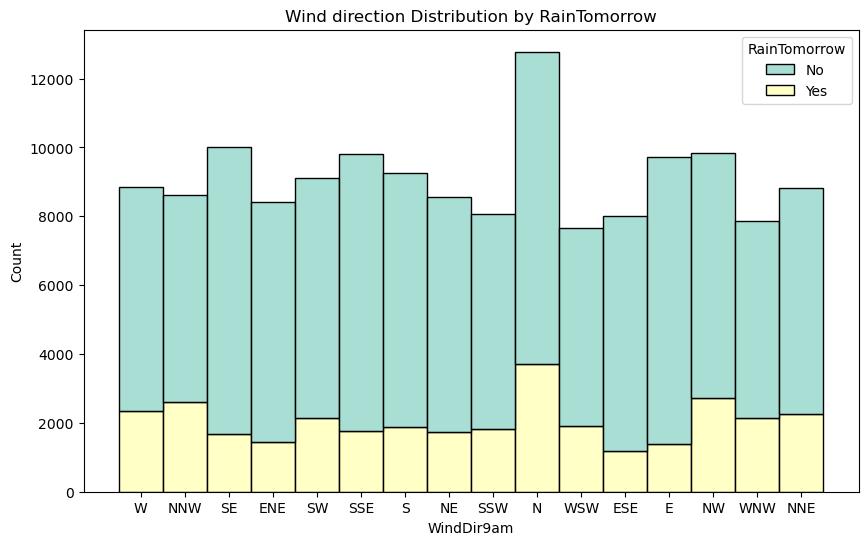

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='WindDir9am', hue='RainTomorrow', multiple='stack', palette="Set3",edgecolor="black")
plt.title('Wind direction Distribution by RainTomorrow')
plt.show()

Location
Walpole          1103
Portland         1101
Cairns            968
NorfolkIsland     932
MountGambier      924
Dartmoor          921
Albany            912
Witchcliffe       895
CoffsHarbour      877
MountGinini       874
Name: count, dtype: int64


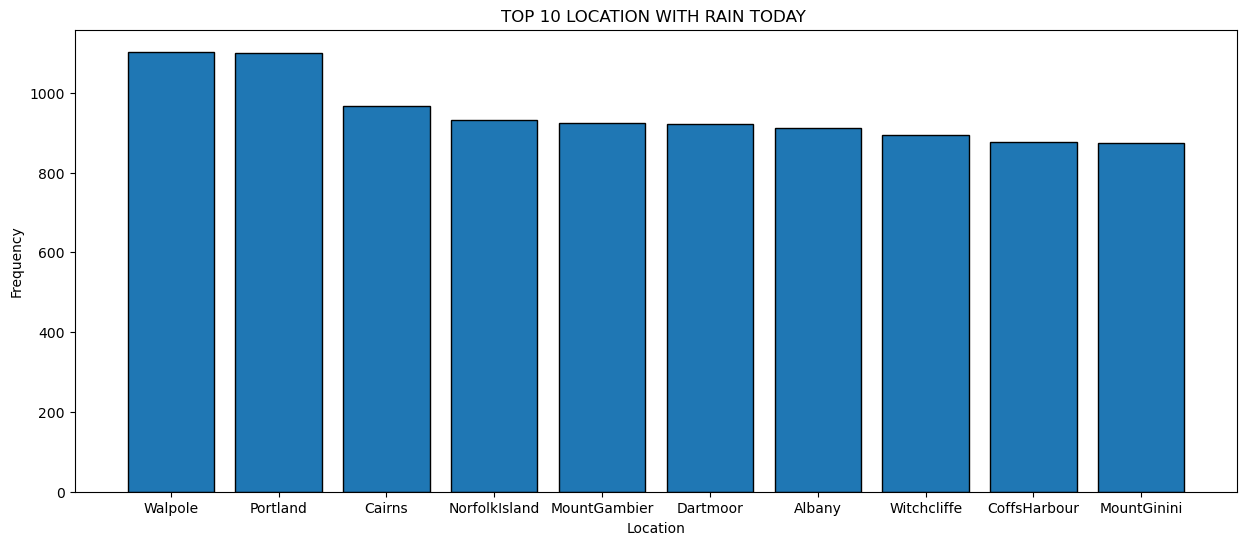

In [39]:
location = data[data['RainToday'] == 'Yes']['Location'].value_counts()

top_cities = location.sort_values(ascending=False).head(10)
print(top_cities)
plt.figure(figsize=(15, 6))
plt.bar(top_cities.index,top_cities.values,edgecolor='black')
plt.title('TOP 10 LOCATION WITH RAIN TODAY ')
plt.xlabel('Location')
plt.ylabel('Frequency')

plt.show()

Location
Walpole          1103
Portland         1102
Cairns            968
NorfolkIsland     932
MountGambier      923
Dartmoor          922
Albany            912
Witchcliffe       895
CoffsHarbour      877
MountGinini       874
Name: count, dtype: int64


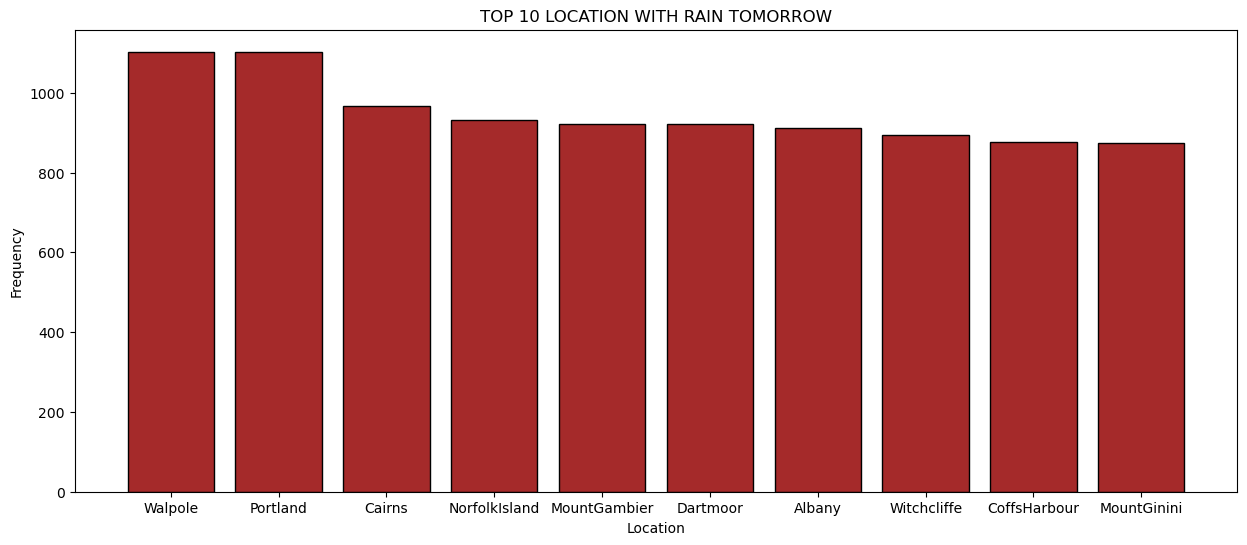

In [40]:
location = data[data['RainTomorrow'] == 'Yes']['Location'].value_counts()
# Sort the cities by total profit in descending order
top_cities = location.sort_values(ascending=False).head(10)
print(top_cities)
plt.figure(figsize=(15, 6))
plt.bar(top_cities.index,top_cities.values,color='brown',edgecolor='black')
plt.title('TOP 10 LOCATION WITH RAIN TOMORROW')
plt.xlabel('Location')
plt.ylabel('Frequency')

plt.show()

Location
Townsville      523
SalmonGums      477
Moree           418
Cobar           390
Mildura         328
Katherine       274
AliceSprings    248
Nhil            244
Woomera         206
Uluru           122
Name: count, dtype: int64


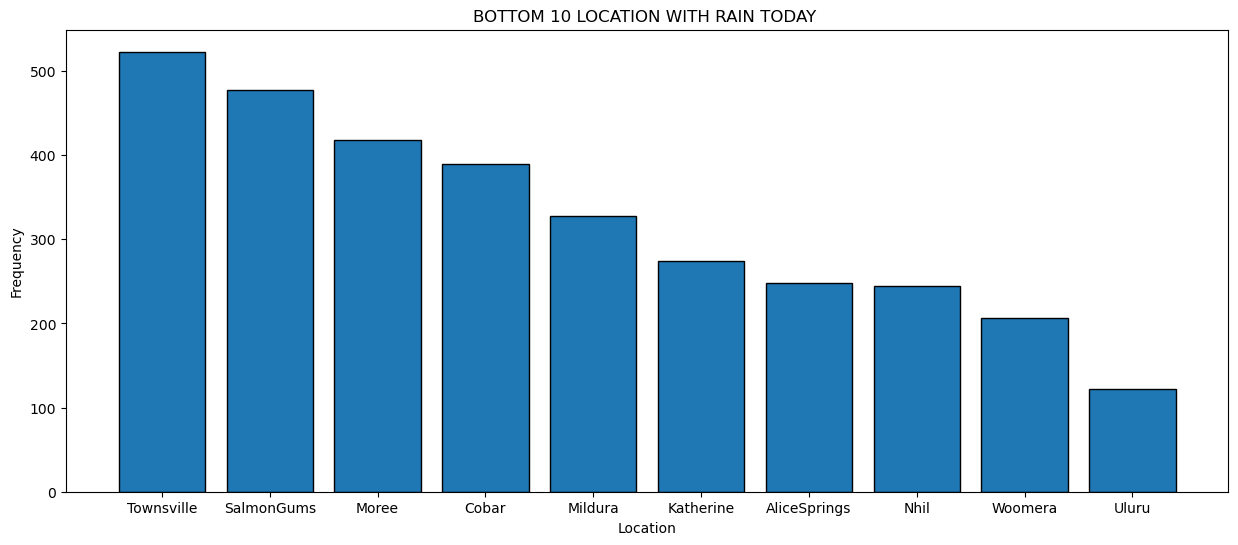

In [41]:
location = data[data['RainToday'] == 'Yes']['Location'].value_counts()

top_cities = location.sort_values(ascending=False).tail(10)
print(top_cities)
plt.figure(figsize=(15, 6))
plt.bar(top_cities.index,top_cities.values,edgecolor='black')
plt.title('BOTTOM 10 LOCATION WITH RAIN TODAY ')
plt.xlabel('Location')
plt.ylabel('Frequency')

plt.show()

Location
Townsville      522
SalmonGums      477
Moree           418
Cobar           390
Mildura         328
Katherine       274
AliceSprings    248
Nhil            244
Woomera         206
Uluru           122
Name: count, dtype: int64


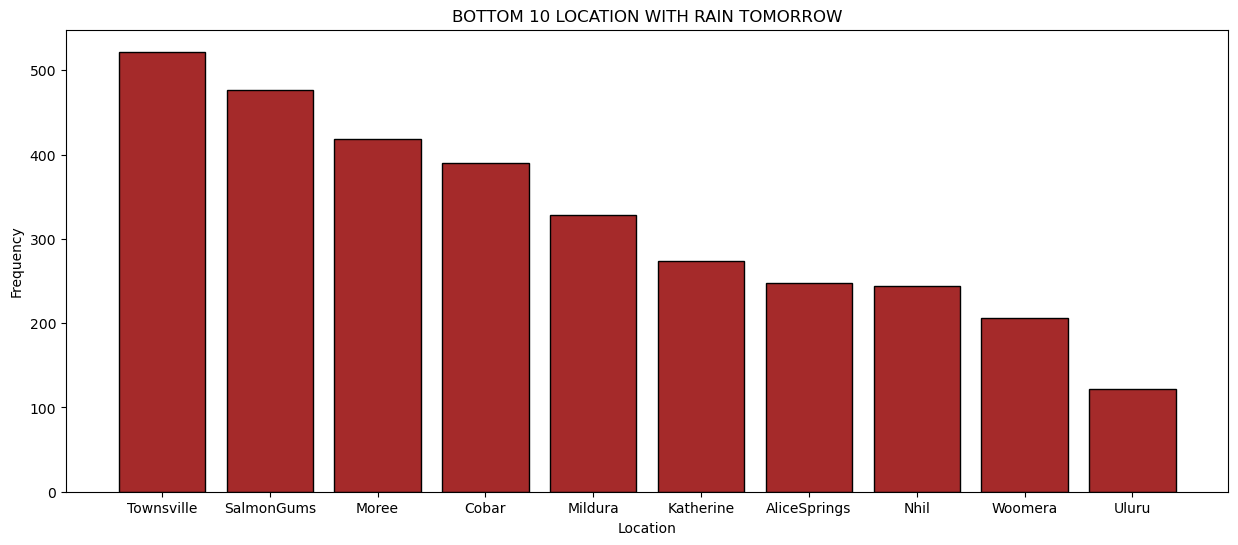

In [42]:
location = data[data['RainTomorrow'] == 'Yes']['Location'].value_counts()

top_cities = location.sort_values(ascending=False).tail(10)
print(top_cities)
plt.figure(figsize=(15, 6))
plt.bar(top_cities.index,top_cities.values,color='brown',edgecolor='black')
plt.title('BOTTOM 10 LOCATION WITH RAIN TOMORROW')
plt.xlabel('Location')
plt.ylabel('Frequency')

plt.show()

WindGustDir
W      4706
N      2546
WNW    2426
NW     2391
WSW    2181
S      2090
NNW    1982
SSW    1957
SW     1897
SSE    1844
SE     1803
NNE    1546
E      1407
NE     1384
ENE    1348
ESE    1251
Name: count, dtype: int64


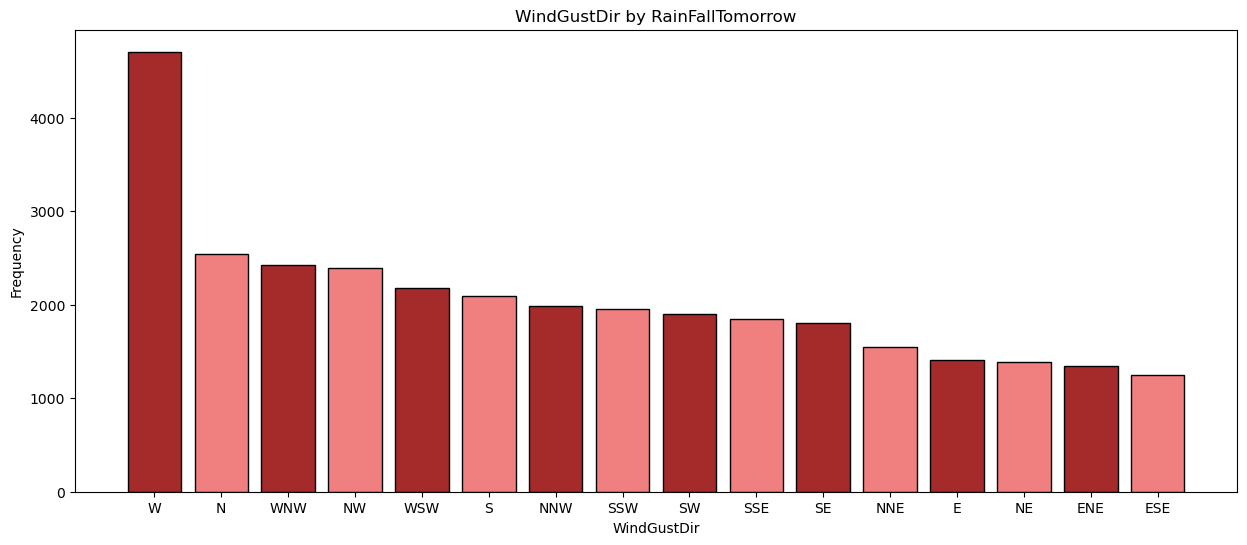

In [43]:
Wind= data[data['RainTomorrow'] == 'Yes']['WindGustDir'].value_counts()

print(Wind)
plt.figure(figsize=(15, 6))
plt.bar(Wind.index,Wind.values,color=['brown','lightcoral'],edgecolor='black')
plt.title('WindGustDir by RainFallTomorrow')
plt.xlabel('WindGustDir')
plt.ylabel('Frequency')

plt.show()

WindDir9am
N      3716
NW     2732
NNW    2603
W      2336
NNE    2267
SW     2152
WNW    2146
WSW    1906
S      1884
SSW    1809
SSE    1775
NE     1722
SE     1684
ENE    1447
E      1387
ESE    1193
Name: count, dtype: int64


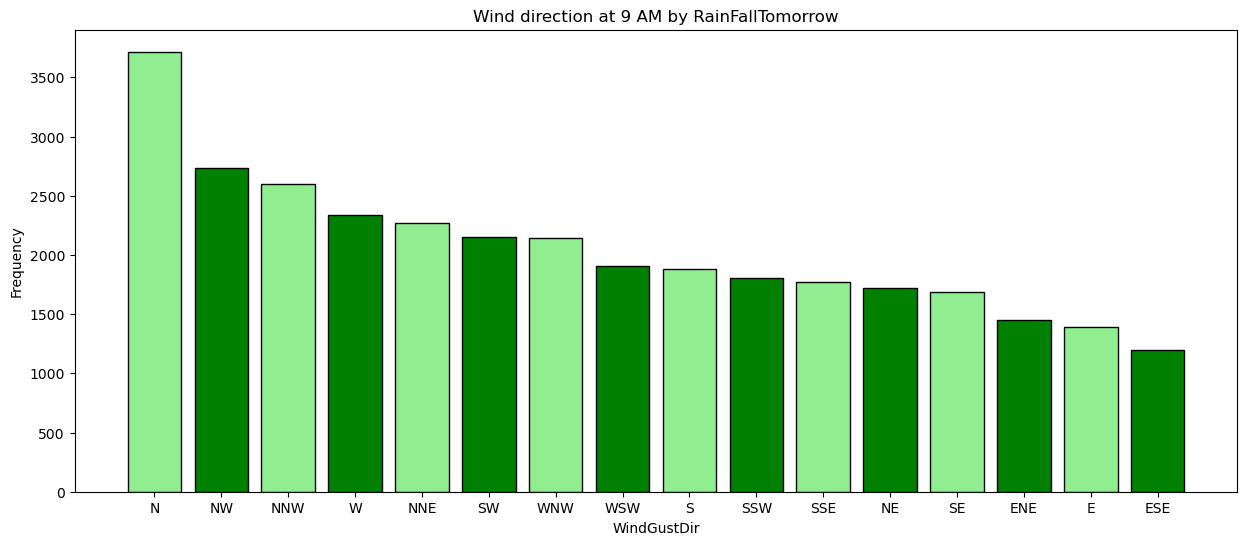

In [44]:
Wind= data[data['RainTomorrow'] == 'Yes']['WindDir9am'].value_counts()

print(Wind)
plt.figure(figsize=(15, 6))
plt.bar(Wind.index,Wind.values,color=['lightgreen','green'],edgecolor='black')
plt.title('Wind direction at 9 AM by RainFallTomorrow')
plt.xlabel('WindGustDir')
plt.ylabel('Frequency')

plt.show()

Location
Cairns          17157.2
Darwin          16260.2
CoffsHarbour    14946.6
GoldCoast       11232.8
Sydney          11094.0
Wollongong      10720.0
Townsville      10571.8
Brisbane         9941.0
NorahHead        9921.4
MountGinini      9570.6
Name: Rainfall, dtype: float64


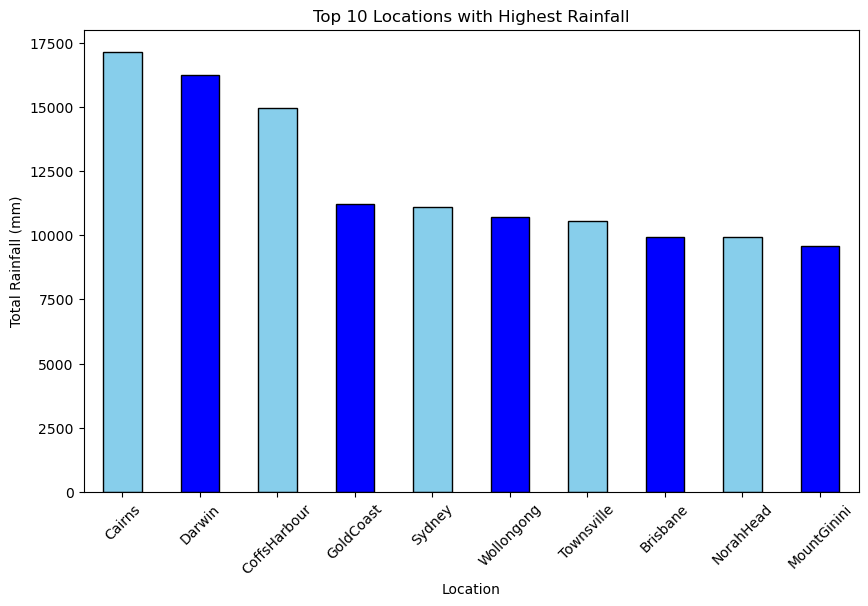

In [45]:
import pandas as pd

# Group by 'Location' and sum the 'Rainfall' values
location_rainfall = data.groupby('Location')['Rainfall'].sum().sort_values(ascending=False)

top_10_locations = location_rainfall.head(10)


print(top_10_locations)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=['skyblue','blue'],edgecolor='black')
plt.title('Top 10 Locations with Highest Rainfall')
plt.xlabel('Location')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45)
plt.show()


In [46]:
# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

rainfall_by_year = data.groupby('Year')['Rainfall'].sum()

year_with_highest_rainfall = rainfall_by_year.idxmax()
highest_rainfall_value = rainfall_by_year.max()

# Display the year and total rainfall
print(f"The year with the highest total rainfall is {year_with_highest_rainfall}, with {highest_rainfall_value} mm of rainfall.")



The year with the highest total rainfall is 2010, with 44518.8 mm of rainfall.


    Year  Rainfall
0   2007     196.4
1   2008    5149.0
2   2009   35949.0
3   2010   44518.8
4   2011   42791.6
5   2012   36346.9
6   2013   36583.4
7   2014   34210.4
8   2015   37234.1
9   2016   41742.4
10  2017   20998.2


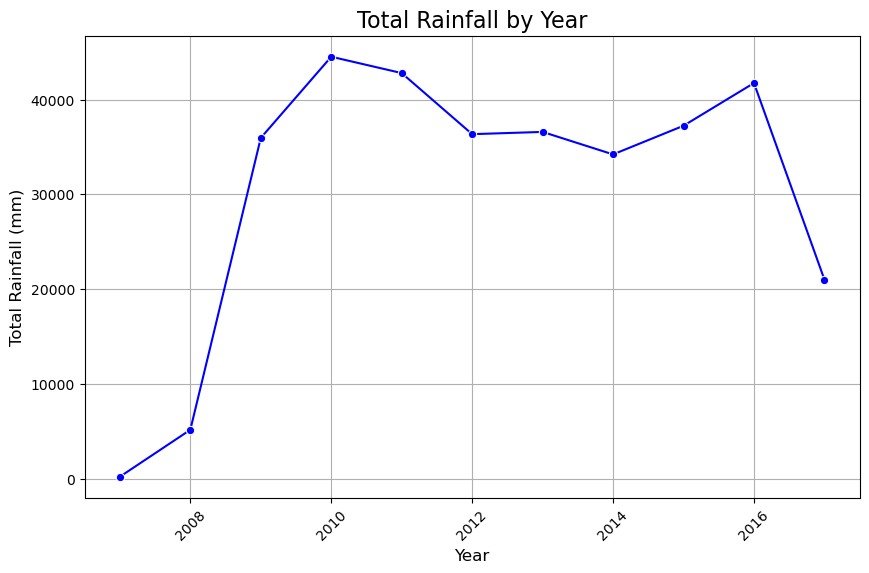

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year

rainfall_by_year = data.groupby('Year')['Rainfall'].sum().reset_index()
print(rainfall_by_year)

plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='Rainfall', data=rainfall_by_year, marker='o', color='b')


plt.title('Total Rainfall by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for better readability
plt.show()


In [48]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

    Month  Rainfall
0       1   35364.7
1       2   33560.7
2       3   36694.8
3       4   26390.5
4       5   26137.6
5       6   34476.8
6       7   25727.8
7       8   23937.5
8       9   21429.3
9      10   19071.6
10     11   25979.7
11     12   26949.2


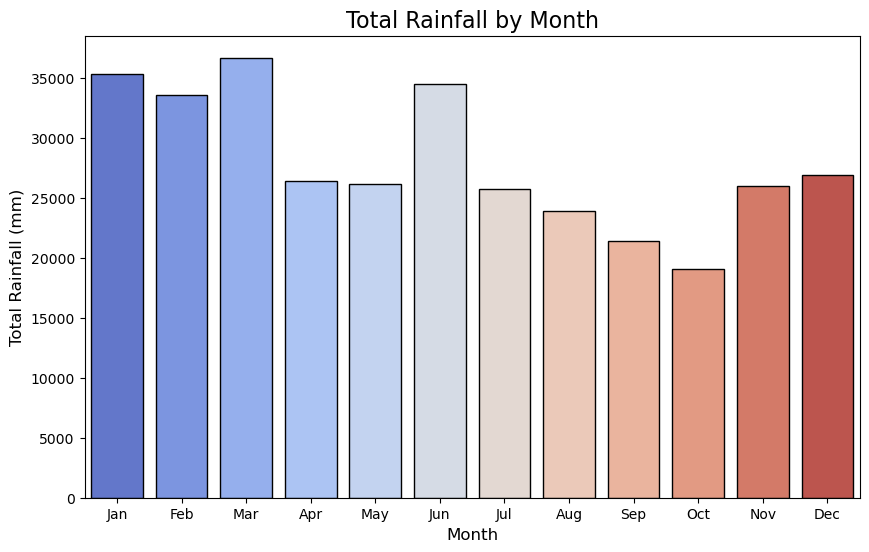

In [49]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month


rainfall_by_year = data.groupby('Month')['Rainfall'].sum().reset_index()
print(rainfall_by_year)


plt.figure(figsize=(10, 6))

sns.barplot(x='Month', y='Rainfall', data=rainfall_by_year, palette='coolwarm',edgecolor='black')


plt.title('Total Rainfall by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

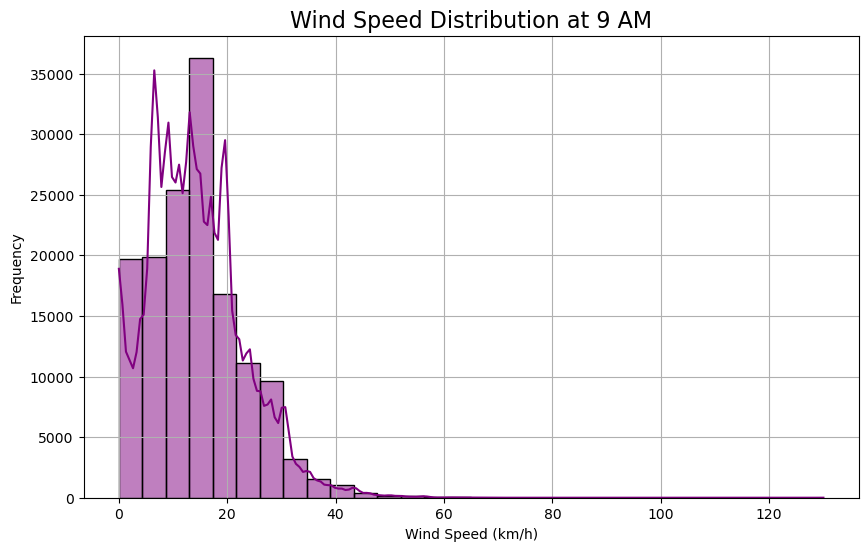

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data['WindSpeed9am'], bins=30, kde=True, color='purple',edgecolor='black')
plt.title('Wind Speed Distribution at 9 AM', fontsize=16)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


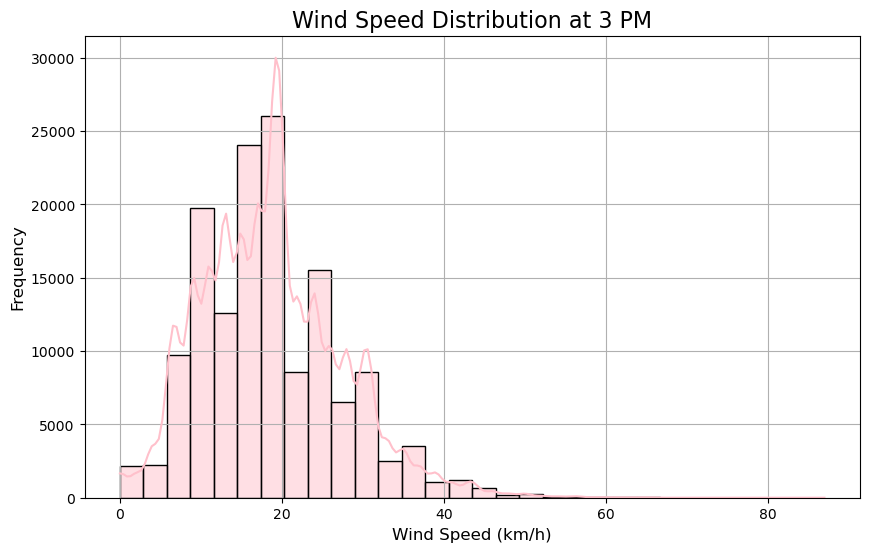

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data['WindSpeed3pm'], bins=30, kde=True, color='pink',edgecolor='black')
plt.title('Wind Speed Distribution at 3 PM', fontsize=16)
plt.xlabel('Wind Speed (km/h)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

        Location    MaxTemp
16     Katherine  34.638501
13        Darwin  32.538059
41         Uluru  30.351425
8         Cairns  29.558849
39    Townsville  29.365139
3   AliceSprings  29.244455
21         Moree  26.950548
48       Woomera  26.593341
7       Brisbane  26.434231
29    PearceRAAF  26.031488


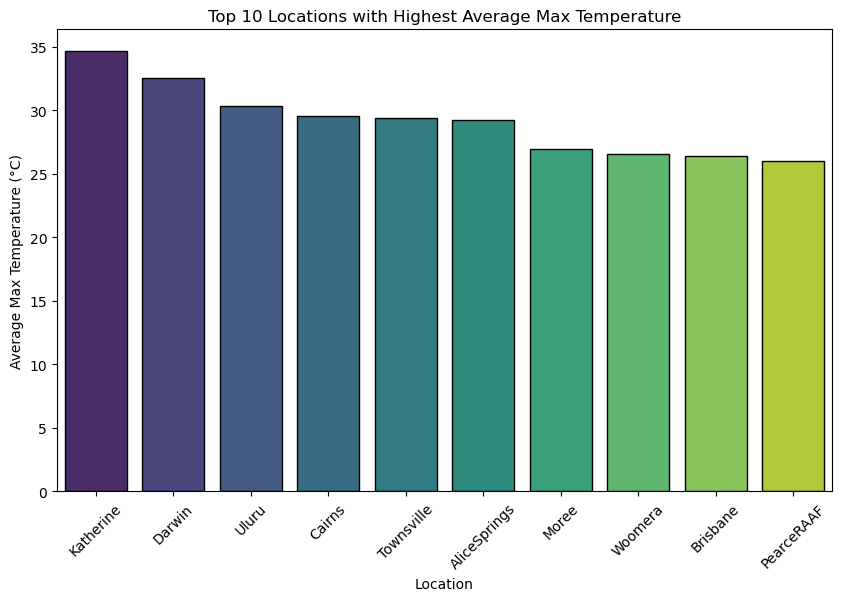

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp_by_location = data.groupby('Location')['MaxTemp'].mean().reset_index()
top_10_locations = avg_temp_by_location.sort_values(by='MaxTemp', ascending=False).head(10)
print(top_10_locations)

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='MaxTemp', data=top_10_locations, palette='viridis',edgecolor='black')


plt.title('Top 10 Locations with Highest Average Max Temperature')
plt.xlabel('Location')
plt.ylabel('Average Max Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


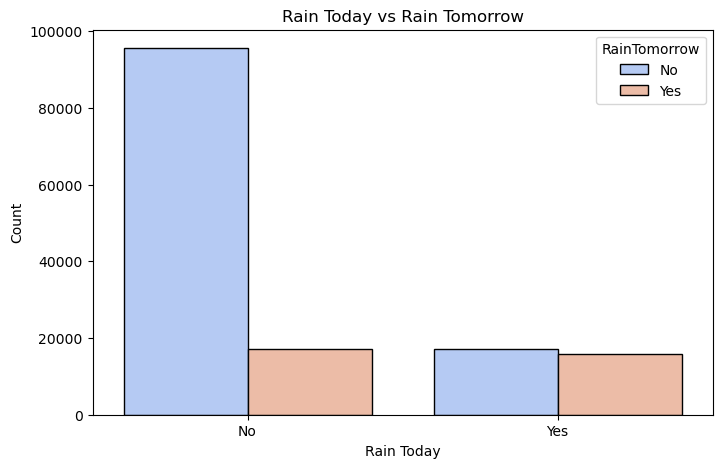

In [53]:
plt.figure(figsize=(8, 5))

sns.countplot(x='RainToday', hue='RainTomorrow', data=data, palette='coolwarm',edgecolor='black')
plt.title('Rain Today vs Rain Tomorrow')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.show()


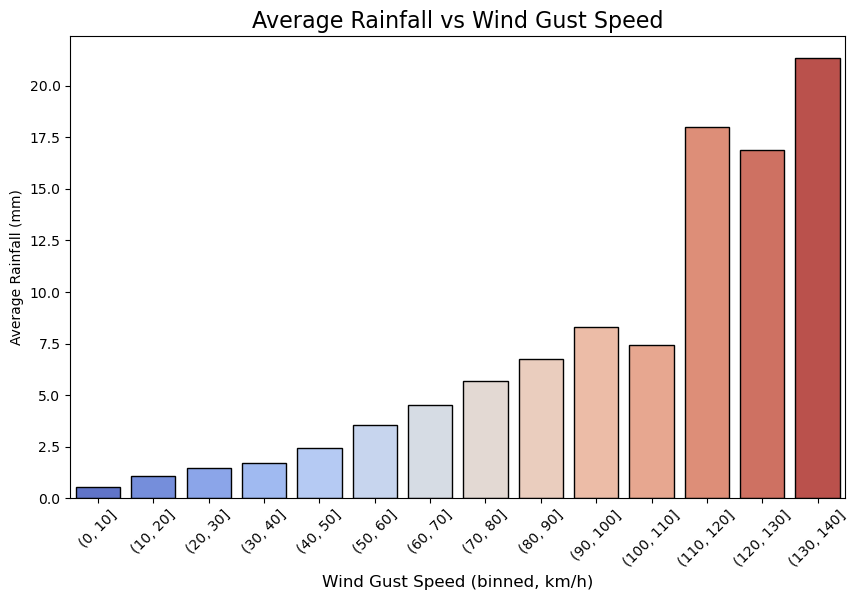

In [54]:
import pandas as pd

# Bin WindGustSpeed into intervals (bins of 10 km/h for example)
data['WindGustSpeedBin'] = pd.cut(data['WindGustSpeed'], bins=range(0, int(data['WindGustSpeed'].max()) + 10, 10))

rainfall_by_wind_speed = data.groupby('WindGustSpeedBin')['Rainfall'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='WindGustSpeedBin', y='Rainfall', data=rainfall_by_wind_speed, palette='coolwarm',edgecolor='black')


plt.title('Average Rainfall vs Wind Gust Speed', fontsize=16)
plt.xlabel('Wind Gust Speed (binned, km/h)', fontsize=12)
plt.ylabel('Average Rainfall (mm)')
plt.xticks(rotation=45)
plt.show()


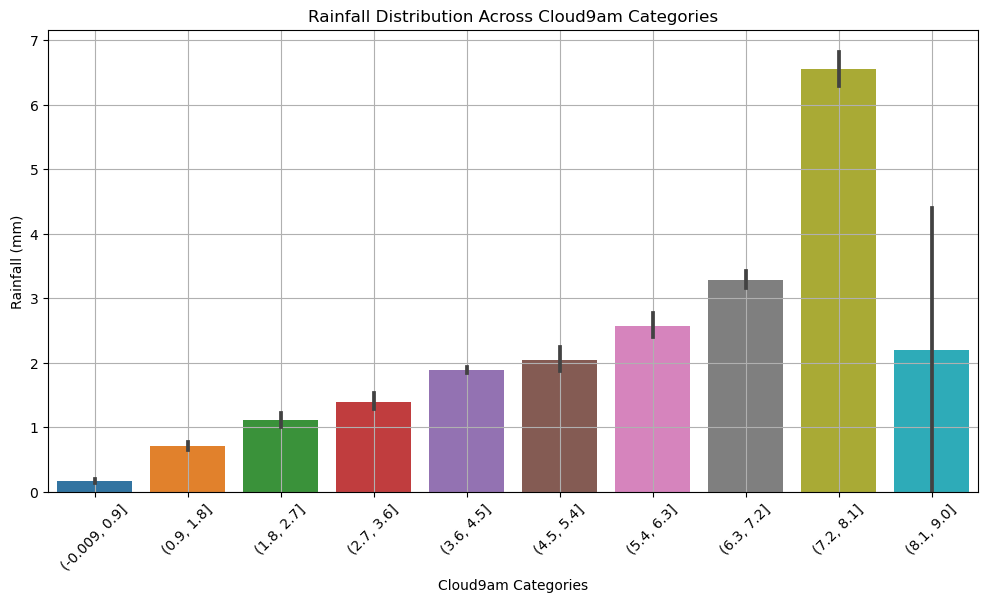

In [55]:
# bin the Cloud9am values into categories
data['Cloud9am_bin'] = pd.cut(data['Cloud9am'], bins=10)  # Adjust bin number as needed

plt.figure(figsize=(12, 6))
sns.barplot(x='Cloud9am_bin', y='Rainfall', data=data)
plt.title('Rainfall Distribution Across Cloud9am Categories')
plt.xlabel('Cloud9am Categories')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


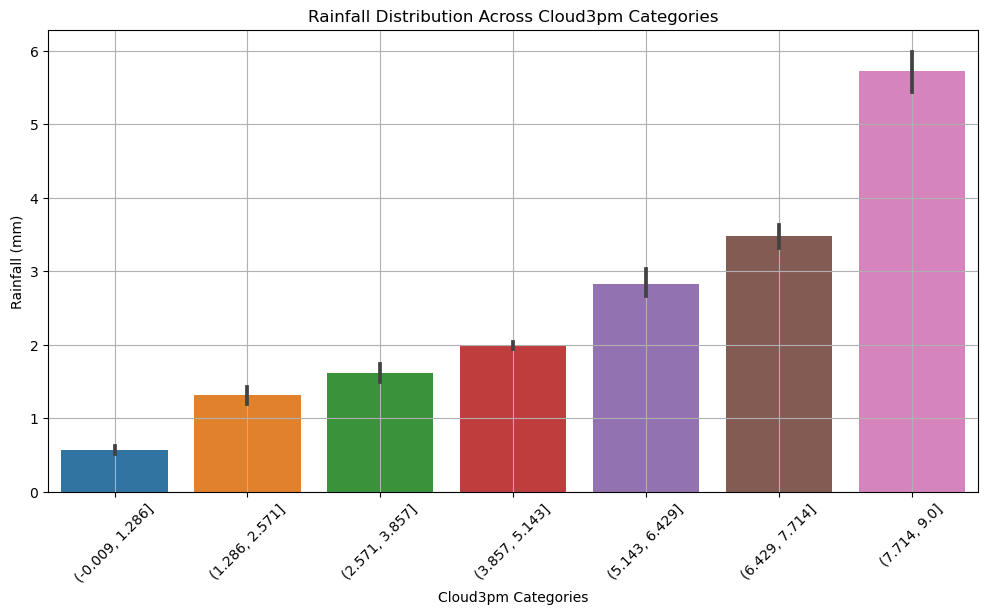

In [56]:
data['Cloud3pm_bin'] = pd.cut(data['Cloud3pm'], bins=7)  

plt.figure(figsize=(12, 6))
sns.barplot(x='Cloud3pm_bin', y='Rainfall', data=data)
plt.title('Rainfall Distribution Across Cloud3pm Categories')
plt.xlabel('Cloud3pm Categories')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

         Location    MinTemp
13         Darwin  23.205855
8          Cairns  21.217498
39     Townsville  20.412463
16      Katherine  20.293985
14      GoldCoast  17.358185
27  NorfolkIsland  16.870320
7        Brisbane  16.411884
26      NorahHead  15.323908
47     Wollongong  14.925925
38  SydneyAirport  14.900829


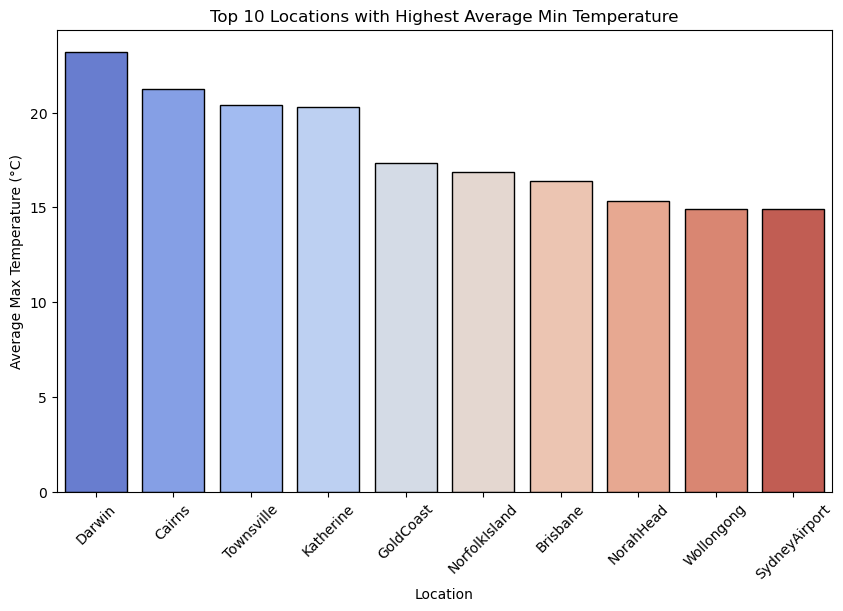

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
avg_temp_by_location = data.groupby('Location')['MinTemp'].mean().reset_index()

top_10_locations = avg_temp_by_location.sort_values(by='MinTemp', ascending=False).head(10)
print(top_10_locations)

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='MinTemp', data=top_10_locations, palette='coolwarm',edgecolor='black')


plt.title('Top 10 Locations with Highest Average Min Temperature')
plt.xlabel('Location')
plt.ylabel('Average Max Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

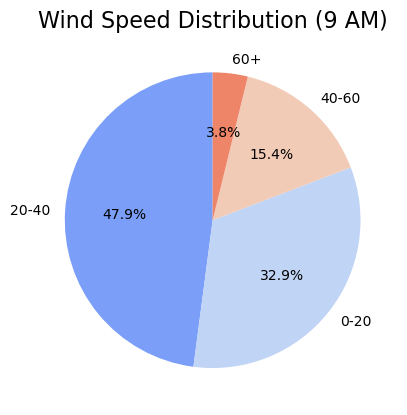

In [58]:
# Bin WindSpeed9am into categories
data['WindSpeedCategory'] = pd.cut(data['WindSpeed9am'], bins=[0, 10, 20, 30, 40], labels=['0-20', '20-40', '40-60', '60+'])

wind_speed_counts = data['WindSpeedCategory'].value_counts()

plt.figure()
plt.pie(wind_speed_counts, labels=wind_speed_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(wind_speed_counts)))
plt.title('Wind Speed Distribution (9 AM)', fontsize=16)
plt.show()


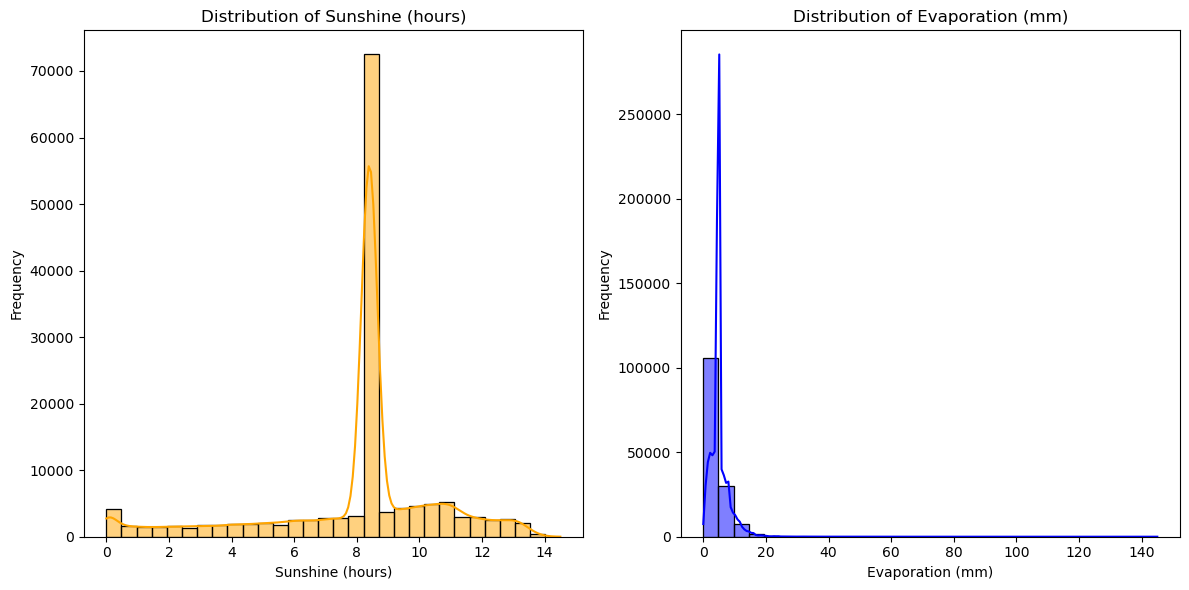

In [59]:
plt.figure(figsize=(12, 6))

# Histogram for Sunshine
plt.subplot(1, 2, 1)
sns.histplot(data['Sunshine'], bins=30, kde=True, color='orange')
plt.title('Distribution of Sunshine (hours)')
plt.xlabel('Sunshine (hours)')
plt.ylabel('Frequency')

# Histogram for Evaporation
plt.subplot(1, 2, 2)
sns.histplot(data['Evaporation'], bins=30, kde=True, color='blue')
plt.title('Distribution of Evaporation (mm)')
plt.xlabel('Evaporation (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


    Month  Evaporation
0       1     7.030417
1       2     6.410155
2       3     5.612087
3       4     4.649766
4       5     3.939085
5       6     3.540539
6       7     3.559410
7       8     4.112562
8       9     4.864132
9      10     5.702802
10     11     6.334630
11     12     6.636455


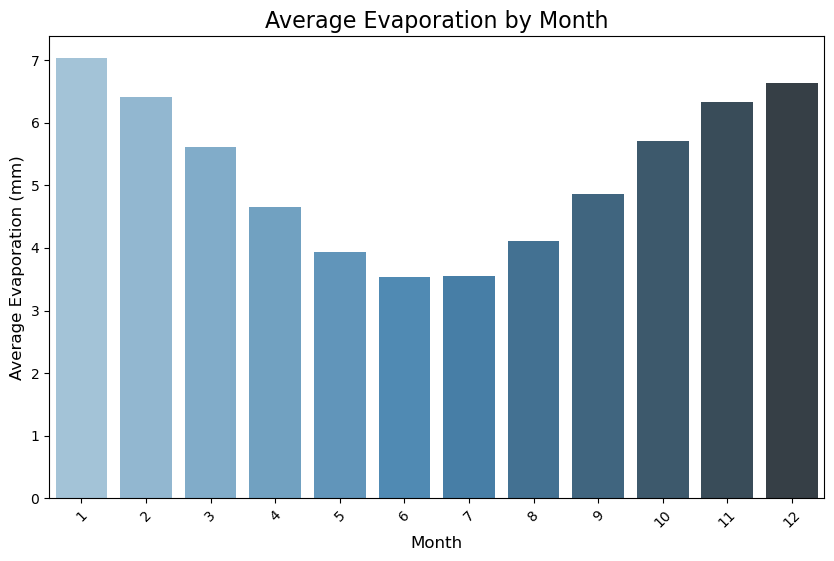

In [60]:
avg_evaporation_by_month = data.groupby('Month')['Evaporation'].mean().reset_index()
print(avg_evaporation_by_month)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Evaporation', data=avg_evaporation_by_month, palette='Blues_d')
plt.title('Average Evaporation by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Evaporation (mm)', fontsize=12)
plt.xticks(rotation=45)

plt.show()


    Month  Sunshine
0       1  8.822892
1       2  8.500630
2       3  7.990682
3       4  7.721056
4       5  7.370164
5       6  7.018228
6       7  7.151501
7       8  7.737903
8       9  8.024476
9      10  8.447714
10     11  8.540312
11     12  8.705337


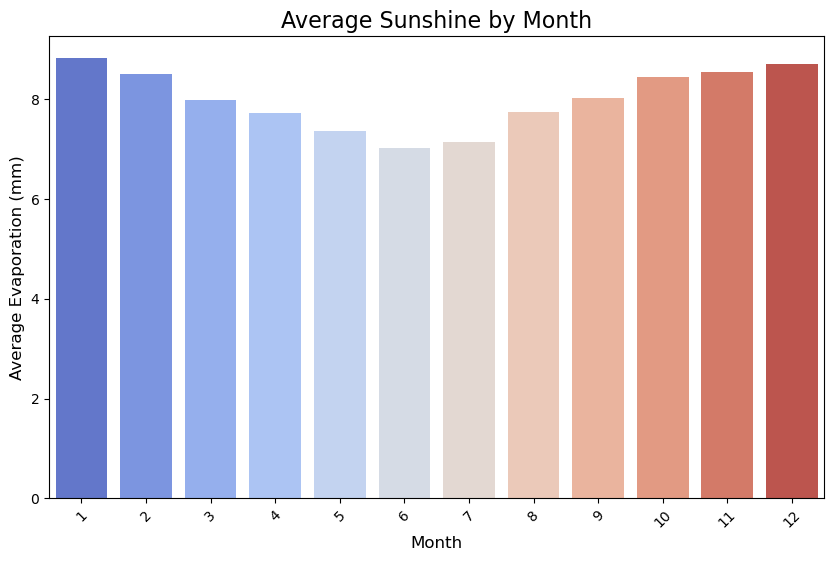

In [61]:
avg_evaporation_by_month = data.groupby('Month')['Sunshine'].mean().reset_index()
print(avg_evaporation_by_month)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sunshine', data=avg_evaporation_by_month, palette='coolwarm')
plt.title('Average Sunshine by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Evaporation (mm)', fontsize=12)
plt.xticks(rotation=45)

plt.show()


SunnyDay
Sunny          143101
No Sunshine      2359
Name: count, dtype: int64


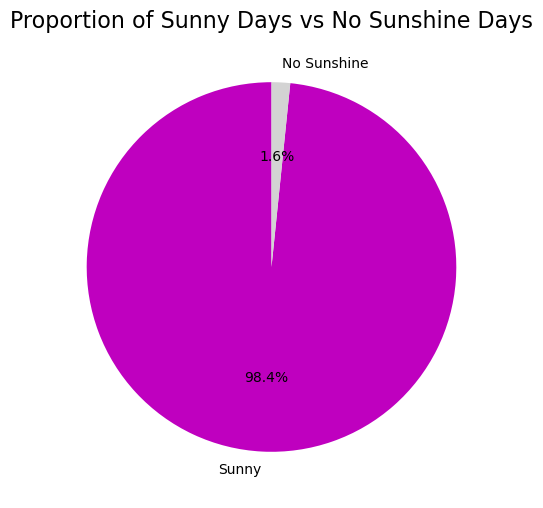

In [62]:
# Categorize days as 'Sunny' or 'No Sunshine'
data['SunnyDay'] = data['Sunshine'].apply(lambda x: 'Sunny' if x > 0 else 'No Sunshine')

sunny_day_counts = data['SunnyDay'].value_counts()
print(sunny_day_counts)

plt.figure(figsize=(6, 6))
plt.pie(sunny_day_counts, labels=sunny_day_counts.index, autopct='%1.1f%%', colors=['m', 'lightgray'], startangle=90)
plt.title('Proportion of Sunny Days vs No Sunshine Days', fontsize=16)

plt.show()


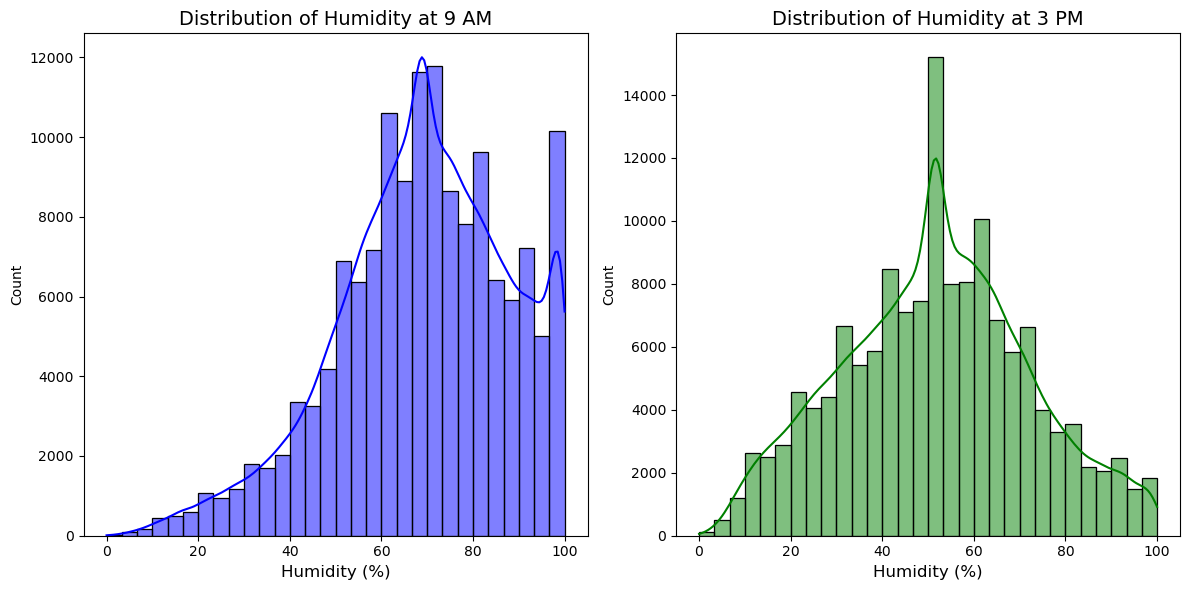

In [63]:
plt.figure(figsize=(12, 6))

# Plot Humidity9am
plt.subplot(1, 2, 1)
sns.histplot(data['Humidity9am'], bins=30, kde=True, color='blue')
plt.title('Distribution of Humidity at 9 AM', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=12)

# Plot Humidity3pm
plt.subplot(1, 2, 2)
sns.histplot(data['Humidity3pm'], bins=30, kde=True, color='green')
plt.title('Distribution of Humidity at 3 PM', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=12)

plt.tight_layout()
plt.show()


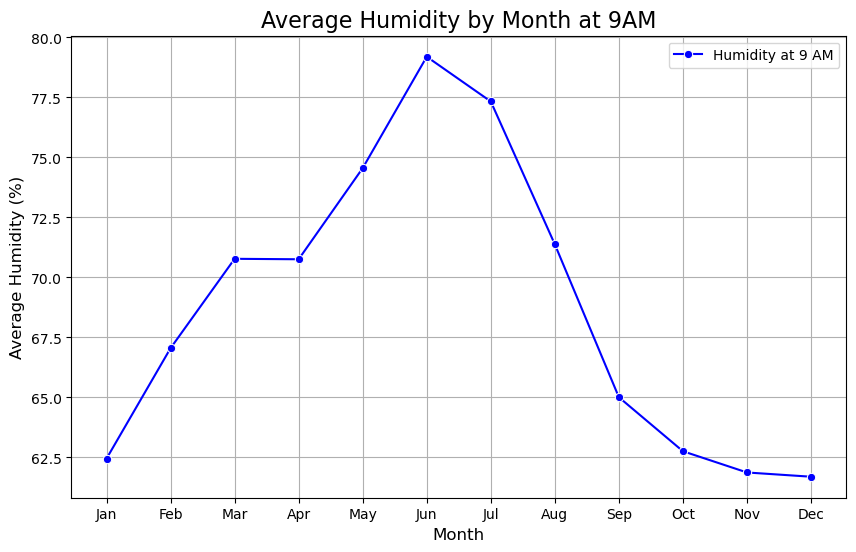

In [64]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

avg_humidity_by_month = data.groupby('Month')['Humidity9am'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Humidity9am', data=avg_humidity_by_month, label='Humidity at 9 AM', marker='o', color='blue')


plt.title('Average Humidity by Month at 9AM', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Humidity (%)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


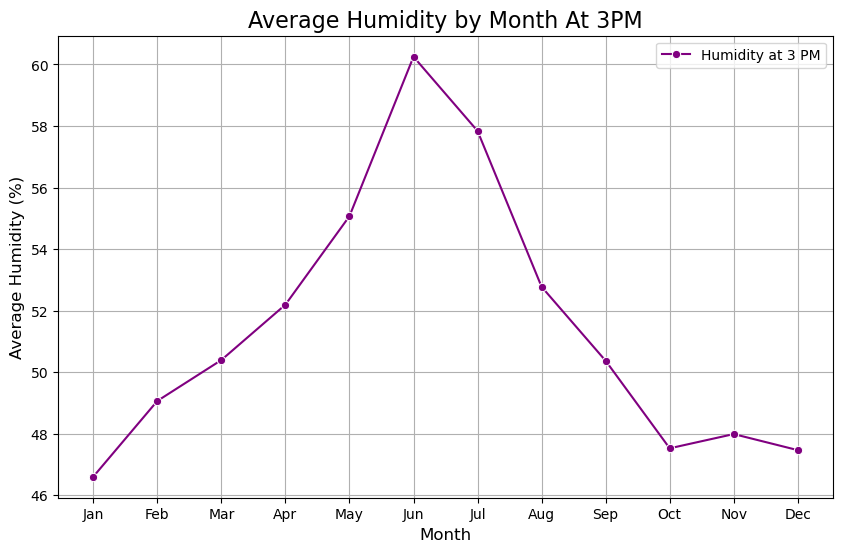

In [65]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

avg_humidity_by_month = data.groupby('Month')['Humidity3pm'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Humidity3pm', data=avg_humidity_by_month, label='Humidity at 3 PM', marker='o', color='purple')


plt.title('Average Humidity by Month At 3PM', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Humidity (%)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               145460 non-null  datetime64[ns]
 1   Location           145460 non-null  object        
 2   MinTemp            145460 non-null  float64       
 3   MaxTemp            145460 non-null  float64       
 4   Rainfall           145460 non-null  float64       
 5   Evaporation        145460 non-null  float64       
 6   Sunshine           145460 non-null  float64       
 7   WindGustDir        145460 non-null  object        
 8   WindGustSpeed      145460 non-null  float64       
 9   WindDir9am         145460 non-null  object        
 10  WindDir3pm         145460 non-null  object        
 11  WindSpeed9am       145460 non-null  float64       
 12  WindSpeed3pm       145460 non-null  float64       
 13  Humidity9am        145460 non-null  float64 

In [67]:
#converting the string to numberic
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
#fit and transform the data
data['RainToday_encoded']=label.fit_transform(data['RainToday'])


In [68]:
#converting the string to numberic
RainTomorrow_maped={"Yes":1,"No":0}
data['RainTomorrow_mapped']=data['RainTomorrow'].map(RainTomorrow_maped)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainTomorrow,Year,Month,WindGustSpeedBin,Cloud9am_bin,Cloud3pm_bin,WindSpeedCategory,SunnyDay,RainToday_encoded,RainTomorrow_mapped
0,2008-12-01,Albury,13.4,22.900000,0.6,4.8,8.4,W,44.00000,W,...,No,2008,12,"(40, 50]","(7.2, 8.1]","(3.857, 5.143]",20-40,Sunny,0,0
1,2008-12-02,Albury,7.4,25.100000,0.0,4.8,8.4,WNW,44.00000,NNW,...,No,2008,12,"(40, 50]","(3.6, 4.5]","(3.857, 5.143]",0-20,Sunny,0,0
2,2008-12-03,Albury,12.9,25.700000,0.0,4.8,8.4,WSW,46.00000,W,...,No,2008,12,"(40, 50]","(3.6, 4.5]","(1.286, 2.571]",20-40,Sunny,0,0
3,2008-12-04,Albury,9.2,28.000000,0.0,4.8,8.4,NE,24.00000,SE,...,No,2008,12,"(20, 30]","(3.6, 4.5]","(3.857, 5.143]",20-40,Sunny,0,0
4,2008-12-05,Albury,17.5,32.300000,1.0,4.8,8.4,W,41.00000,ENE,...,No,2008,12,"(40, 50]","(6.3, 7.2]","(7.714, 9.0]",0-20,Sunny,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,4.8,8.4,E,31.00000,SE,...,No,2017,6,"(30, 40]","(3.6, 4.5]","(3.857, 5.143]",20-40,Sunny,0,0
145456,2017-06-22,Uluru,3.6,25.300000,0.0,4.8,8.4,NNW,22.00000,SE,...,No,2017,6,"(20, 30]","(3.6, 4.5]","(3.857, 5.143]",20-40,Sunny,0,0
145457,2017-06-23,Uluru,5.4,26.900000,0.0,4.8,8.4,N,37.00000,SE,...,No,2017,6,"(30, 40]","(3.6, 4.5]","(3.857, 5.143]",0-20,Sunny,0,0
145458,2017-06-24,Uluru,7.8,27.000000,0.0,4.8,8.4,SE,28.00000,SSE,...,No,2017,6,"(20, 30]","(2.7, 3.6]","(1.286, 2.571]",20-40,Sunny,0,0


In [69]:
# Define features and target variable
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
        'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

# Define multiple targets
y = data[['RainToday_encoded', 'RainTomorrow_mapped']]

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
dtypes: float64(16)
memory usage: 17.8 MB


In [71]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   RainToday_encoded    145460 non-null  int32
 1   RainTomorrow_mapped  145460 non-null  int64
dtypes: int32(1), int64(1)
memory usage: 1.7 MB


In [72]:
#spliting the data for test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
#testing and training dataset by using the decision Tree
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base classifier
base_clf = DecisionTreeClassifier(random_state=42)

# Initialize the multi-output classifier
multi_target_clf = MultiOutputClassifier(base_clf, n_jobs=-1)

# Train the model
multi_target_clf.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42),
                      n_jobs=-1)

In [74]:
#finding the accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = multi_target_clf.predict(X_test)

# Evaluate the model for each target
for i, target in enumerate(['RainToday_encoded', 'RainTomorrow_mapped']):
    print(f'Performance for {target}:')
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f'Accuracy: {accuracy:.2f}')
   

Performance for RainToday_encoded:
Accuracy: 0.99
Performance for RainTomorrow_mapped:
Accuracy: 0.78


In [75]:
#value counts of class 0 and 1
#(here both are same)
count_class_0,count_class_1 = data.RainToday_encoded.value_counts()

#divide by class
data_class_0 = data[data['RainToday_encoded']==0]
data_class_1 = data[data['RainToday_encoded']==1]

In [76]:
#value counts of class 2 and 3
count_class_2,count_class_3 = data.RainTomorrow_mapped.value_counts()

#divide by class
data_class_2 = data[data['RainTomorrow_mapped']==0]
data_class_3 = data[data['RainTomorrow_mapped']==1]

In [77]:
print(data_class_0.shape)
print(data_class_1.shape)

(112698, 32)
(32762, 32)


In [78]:
print(data_class_2.shape)
print(data_class_3.shape)

(112701, 32)
(32759, 32)


In [79]:
#undersample 0-class and concat the dataframes of both class

a=data_class_0.sample(count_class_1)
data_test_under = pd.concat([a,data_class_1],axis=0)
print("Random under-sampling:")
print(data_test_under.RainToday_encoded.value_counts())

Random under-sampling:
RainToday_encoded
0    32762
1    32762
Name: count, dtype: int64


In [80]:
#oversample 1-class and concat the dataframes of both class
data_class_3_over = data_class_3.sample(count_class_2,replace=True)
data_test_over=pd.concat([data_class_2,data_class_3_over],axis=0)

print("Random over-sampling:")
print(data_test_over.RainTomorrow_mapped.value_counts())

Random over-sampling:
RainTomorrow_mapped
0    112701
1    112701
Name: count, dtype: int64


In [81]:
#dipslaying the data after balancing
print(data_test_under["RainToday_encoded"].value_counts())
print(data_test_over["RainTomorrow_mapped"].value_counts())

RainToday_encoded
0    32762
1    32762
Name: count, dtype: int64
RainTomorrow_mapped
0    112701
1    112701
Name: count, dtype: int64


In [82]:
#spliting x and y and fing the target variable
X=data_test_under[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
        'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6214,4.7,14.9,0.0,3.4,2.7,24.0,9.0,13.0,68.0,60.0,1013.0,1011.6,6.000000,7.00000,7.9,14.1
86001,18.6,30.2,0.6,6.6,11.1,24.0,4.0,9.0,61.0,48.0,1015.9,1011.4,3.000000,1.00000,25.1,28.2
11534,18.6,26.5,0.0,4.8,8.4,26.0,13.0,19.0,69.0,66.0,1020.1,1018.7,2.000000,4.50993,23.9,26.1
65749,7.9,14.7,0.0,3.4,4.6,48.0,31.0,20.0,79.0,46.0,1016.7,1016.7,2.000000,6.00000,8.9,13.7
84673,16.5,27.4,0.0,3.0,8.5,15.0,4.0,9.0,69.0,53.0,1022.2,1018.5,5.000000,1.00000,22.7,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145325,22.2,39.4,6.2,4.8,8.4,30.0,19.0,9.0,56.0,25.0,1008.4,1004.9,4.447461,4.00000,28.6,38.7
145391,15.2,21.5,6.8,4.8,8.4,30.0,19.0,9.0,65.0,65.0,1016.9,1015.3,3.000000,8.00000,19.0,21.2
145392,17.7,26.9,12.6,4.8,8.4,35.0,15.0,20.0,93.0,59.0,1018.1,1014.7,7.000000,8.00000,19.0,26.0
145393,18.6,28.6,34.6,4.8,8.4,46.0,4.0,9.0,100.0,56.0,1020.0,1015.8,8.000000,5.00000,19.8,26.9


In [83]:
y=data_test_under["RainToday_encoded"]
y

6214      0
86001     0
11534     0
65749     0
84673     0
         ..
145325    1
145391    1
145392    1
145393    1
145394    1
Name: RainToday_encoded, Length: 65524, dtype: int32

In [84]:
#spliting for tain and test n=by 25%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [85]:
#taking the logistic regression algorithm(sklearn.linear_model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #checking the accuracy (it will be same in all the model)

model = LogisticRegression()

#model fitting(fit keyword is use to train the model)
model.fit(x_train,y_train)

#testing tht model(predict keyword is use to test the model)
pred=model.predict(x_test)


#model accuracy
acc=accuracy_score(y_test,pred)
print("logistic regression model accuracy for RainToday(in %):" ,acc*100)

logistic regression model accuracy for RainToday(in %): 97.57646053354496


In [86]:
X=data_test_over[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
        'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.8,8.4,44.00000,20.0,24.0,71.000000,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
1,7.4,25.1,0.0,4.8,8.4,44.00000,4.0,22.0,44.000000,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2,12.9,25.7,0.0,4.8,8.4,46.00000,19.0,26.0,38.000000,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
3,9.2,28.0,0.0,4.8,8.4,24.00000,11.0,9.0,45.000000,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
4,17.5,32.3,1.0,4.8,8.4,41.00000,7.0,20.0,82.000000,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140747,25.1,33.3,0.0,5.2,7.5,33.00000,0.0,24.0,77.000000,61.0,1010.4,1007.9,4.000000,5.00000,30.3,31.9
128362,4.9,16.2,0.0,4.8,8.4,40.03523,9.0,13.0,95.000000,60.0,1028.5,1024.7,4.447461,4.50993,8.8,15.6
140426,23.8,32.2,28.8,5.8,9.3,72.00000,7.0,19.0,79.000000,66.0,1006.6,1003.1,6.000000,7.00000,28.2,31.0
75675,13.1,16.4,9.2,5.0,3.9,50.00000,13.0,15.0,68.880831,91.0,1011.2,1010.8,8.000000,8.00000,16.7,14.5


In [87]:
y=data_test_over["RainTomorrow_mapped"]
y

0         0
1         0
2         0
3         0
4         0
         ..
140747    1
128362    1
140426    1
75675     1
82994     1
Name: RainTomorrow_mapped, Length: 225402, dtype: int64

In [88]:
#ramdon forest 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.04)
 
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train, y_train)

pred= clf.predict(X_test)

acc=accuracy_score(y_test,pred)
print(f"Accuracy for RainTomorrow: {acc:2f}") 

Accuracy for RainTomorrow: 0.960741


In [89]:
#balance the dataset by iblearn
from imblearn.over_sampling import SMOTE

#initialize SMOTE with sampling strategy (you can adjust it as needed)
smote = SMOTE(sampling_strategy='auto')

#apply SMOTE to resample the dataset
x_resampled, y_resampled = smote.fit_resample(X,y)
y_resampled.value_counts()

RainTomorrow_mapped
0    112701
1    112701
Name: count, dtype: int64

In [90]:
#NAIVE BAYES
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25)#standard is 25%
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train, y_train)

pred= gnb.predict(x_test)

acc=accuracy_score(y_test,pred)
print(f"Accuracy for rain tomorrow: {acc:2f}")

Accuracy for rain tomorrow: 0.746571


In [91]:
#balacing the both raintoday and rain tomorrow by under sampling
count_class_0,count_class_1 = data.RainToday_encoded.value_counts()
count_class_2,count_class_3 = data.RainTomorrow_mapped.value_counts()
#divide by class
data_class_0 = data[data['RainToday_encoded']==0]
data_class_1 = data[data['RainToday_encoded']==1]
data_class_2 = data[data['RainTomorrow_mapped']==0]
data_class_3 = data[data['RainTomorrow_mapped']==1]

a=data_class_0.sample(count_class_1)
data_test_under = pd.concat([a,data_class_1],axis=0)
print("Random under-sampling:")
print(data_test_under.RainToday_encoded.value_counts())

a=data_class_2.sample(count_class_3)
data_test_under = pd.concat([a,data_class_3],axis=0)
print("Random under-sampling:")
print(data_test_under.RainTomorrow_mapped.value_counts())



Random under-sampling:
RainToday_encoded
0    32762
1    32762
Name: count, dtype: int64
Random under-sampling:
RainTomorrow_mapped
0    32759
1    32759
Name: count, dtype: int64


In [92]:
# Define features and target variable
X = data_test_under[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
        'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

# Define multiple targets
y = data_test_under[['RainToday_encoded', 'RainTomorrow_mapped']]

In [93]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
80808,8.4,20.4,0.0,10.2,13.5,35.0,4.0,19.0,70.0,41.0,1022.70000,1021.800000,2.000000,1.00000,11.5,19.8
25243,20.0,27.1,0.2,4.8,8.4,24.0,4.0,7.0,98.0,66.0,1017.64994,1015.255889,4.447461,4.50993,21.4,26.3
39559,21.8,28.8,0.0,11.2,1.3,41.0,11.0,13.0,67.0,84.0,1010.10000,1008.000000,7.000000,7.00000,25.7,24.9
43305,17.0,23.4,0.0,4.8,8.4,52.0,22.0,44.0,65.0,72.0,1018.50000,1014.600000,8.000000,4.50993,21.4,22.2
19461,14.1,19.0,0.0,4.8,8.4,43.0,7.0,17.0,63.0,62.0,1017.10000,1013.700000,4.447461,4.50993,17.6,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145324,24.8,39.8,0.4,4.8,8.4,65.0,15.0,20.0,38.0,24.0,1007.00000,1003.600000,4.447461,4.50993,31.5,36.6
145390,19.3,24.4,0.0,4.8,8.4,35.0,7.0,19.0,28.0,91.0,1015.90000,1013.900000,8.000000,8.00000,21.3,18.5
145391,15.2,21.5,6.8,4.8,8.4,30.0,19.0,9.0,65.0,65.0,1016.90000,1015.300000,3.000000,8.00000,19.0,21.2
145392,17.7,26.9,12.6,4.8,8.4,35.0,15.0,20.0,93.0,59.0,1018.10000,1014.700000,7.000000,8.00000,19.0,26.0


In [94]:
y

,RainToday_encoded,RainTomorrow_mapped
80808,0,0
25243,0,0
39559,0,0
43305,0,0
19461,0,0
...,...,...
145324,0,1
145390,0,1
145391,1,1
145392,1,1


In [95]:
# decision Tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base classifier
base_clf = DecisionTreeClassifier(random_state=42)

# Initialize the multi-output classifier
multi_target_Rlf = MultiOutputClassifier(base_clf, n_jobs=-1)

# Train the model
multi_target_Rlf.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42),
                      n_jobs=-1)

In [110]:
#finding accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = multi_target_Rlf.predict(X_test)

# Evaluate the model for each target
for i, target in enumerate(['RainToday_encoded', 'RainTomorrow_mapped']):
    print(f'Performance for {target}:')
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f'Accuracy: {accuracy:.2f}')

Performance for RainToday_encoded:
Accuracy: 0.98
Performance for RainTomorrow_mapped:
Accuracy: 0.71


In [111]:
#save the model(using machine learning)
import pickle
with open('Weather_DT.pkl', 'wb')as file:
    pickle.dump(multi_target_Rlf,file)

with open('Weather_DT.pkl', 'rb')as file:
    load_multi_target_Rlf=pickle.load(file)

In [113]:
# Prediting the output
import pandas as pd

# Define the function to predict RainToday and RainTomorrow
def predict_rain_day(MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed,
                     WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, 
                     Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm):
    
    # Prepare the input data in the same format as the training data
    input_data = pd.DataFrame({
        'MinTemp': [MinTemp],
        'MaxTemp': [MaxTemp],
        'Rainfall': [Rainfall],
        'Evaporation': [Evaporation],
        'Sunshine': [Sunshine],
        'WindGustSpeed': [WindGustSpeed],
        'WindSpeed9am': [WindSpeed9am],
        'WindSpeed3pm': [WindSpeed3pm],
        'Humidity9am': [Humidity9am],
        'Humidity3pm': [Humidity3pm],
        'Pressure9am': [Pressure9am],
        'Pressure3pm': [Pressure3pm],
        'Cloud9am': [Cloud9am],
        'Cloud3pm': [Cloud3pm],
        'Temp9am': [Temp9am],
        'Temp3pm': [Temp3pm]
    })

    # Make prediction using the trained model
    predicted_value = multi_target_Rlf.predict(input_data)


    # Access predictions for the two target variables
    rain_today = "Yes" if (predicted_value[0] == 1) .all() else "No"
    rain_tomorrow = "Yes" if (predicted_value[0] == 1 ).all() else "No"

    return rain_today, rain_tomorrow

# Get inputs from the user
new_MinTemp = float(input("Enter value for MinTemp(eg:1,11,15.4 14.2 etc): "))
new_MaxTemp = float(input("Enter value for MaxTemp(eg:15.2,24,1,30.1): "))
new_Rainfall = float(input("Enter value for Rainfall(eg:0.1,0.0,12.6): "))
new_Evaporation = float(input("Enter value for Evaporation(eg:1.5,4.5,5.5): "))
new_Sunshine = float(input("Enter value for Sunshine(eg:4.5,8.5,7.2): "))
new_WindGustSpeed = float(input("Enter value for WindGustSpeed(eg:10.1,13.4): "))
new_WindSpeed9am = float(input("Enter value for WindSpeed9am(eg:10.1,13.4): "))
new_WindSpeed3pm = float(input("Enter value for WindSpeed3pm(eg:15.2,24,1,30.1): "))
new_Humidity9am = float(input("Enter value for Humidity9am(eg:55.5,60.2): "))
new_Humidity3pm = float(input("Enter value for Humidity3pm(70.8,100.2): "))
new_Pressure9am = float(input("Enter value for Pressure9am(1026.1,1020.3,1015.5): "))
new_Pressure3pm = float(input("Enter value for Pressure3pm(1001.3,1000.2,): "))
new_Cloud9am = float(input("Enter value for Cloud9am(1.000000,7.000000,4.000000): "))
new_Cloud3pm = float(input("Enter value for Cloud3pm(4.000000,8.000000): "))
new_Temp9am = float(input("Enter value for Temp9am(eg:15.2,24,1,30.1): "))
new_Temp3pm = float(input("Enter value for Temp3pm(eg:1,11,15.4 14.2 etc): "))

# Predict for the two target variables
rain_today, rain_tomorrow = predict_rain_day(new_MinTemp, new_MaxTemp, new_Rainfall, new_Evaporation, new_Sunshine, 
                                             new_WindGustSpeed, new_WindSpeed9am, new_WindSpeed3pm, 
                                             new_Humidity9am, new_Humidity3pm, new_Pressure9am, new_Pressure3pm, 
                                             new_Cloud9am, new_Cloud3pm, new_Temp9am, new_Temp3pm)

# Print the predictions
print(f"Prediction for RainToday: {rain_today}")
print(f"Prediction for RainTomorrow: {rain_tomorrow}")


Enter value for MinTemp(eg:1,11,15.4 14.2 etc):  1
Enter value for MaxTemp(eg:15.2,24,1,30.1):  1
Enter value for Rainfall(eg:0.1,0.0,12.6):  1
Enter value for Evaporation(eg:1.5,4.5,5.5):  1
Enter value for Sunshine(eg:4.5,8.5,7.2):  1
Enter value for WindGustSpeed(eg:10.1,13.4):  1
Enter value for WindSpeed9am(eg:10.1,13.4):  1
Enter value for WindSpeed3pm(eg:15.2,24,1,30.1):  1
Enter value for Humidity9am(eg:55.5,60.2):  1
Enter value for Humidity3pm(70.8,100.2):  1
Enter value for Pressure9am(1026.1,1020.3,1015.5):  1
Enter value for Pressure3pm(1001.3,1000.2,):  1
Enter value for Cloud9am(1.000000,7.000000,4.000000):  1
Enter value for Cloud3pm(4.000000,8.000000):  1
Enter value for Temp9am(eg:15.2,24,1,30.1):  1
Enter value for Temp3pm(eg:1,11,15.4 14.2 etc):  1


Prediction for RainToday: No
Prediction for RainTomorrow: No
